In [ ]:
import numpy as np

# 랜덤시드 고정시키기
np.random.seed(5)

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# 데이터셋 불러오기
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=15,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
                                   
img = load_img('warehouse/hard_handwriting_shape/train/triangle/triangle001.png')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0

# 이 for는 무한으로 반복되기 때문에 우리가 원하는 반복횟수를 지정하여, 지정된 반복횟수가 되면 빠져나오도록 해야합니다.
for batch in train_datagen.flow(x, batch_size=1, save_to_dir='warehouse/preview', save_prefix='tri', save_format='png'):
    i += 1
    if i > 30: 
        break

In [2]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [3]:
import os

In [124]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import matplotlib.pyplot as plt
import glob
import re
import cv2
import numpy as np
import tensorflow as tf

folder = os.listdir('../data/LEGO brick images/train/lego/')

In [182]:
gen = []
c1 = os.listdir('../data/LEGO brick images/train/1/')
for i in range(len(c1)):
    aa = plt.imread('../data/LEGO brick images/train/1/'+c1[i])
    aa = aa.reshape((1,)+aa.shape)
    gen.append(aa)
gen2 = []
gen3 = []
a1 = generator.flow(gen)
for i in range(66):
    a3 = a1.next()[0][0]
    gen2.append(a3)
    gen3.append(0)
        

In [180]:
x_data = []
y_data = []
for i in range(1,4):
    a1 = folder[i]
    a2 = '../data/LEGO brick images/train/lego/'+a1+'/'
    c = os.listdir(a2)
    for j in c:
        img = plt.imread(a2+j)
        #img = cv2.resize(img, dsize=(30, 30), interpolation=cv2.INTER_AREA)
        x_data.append(img)
        y_data.append(i)
        
        
    

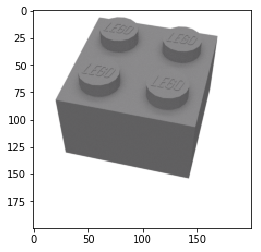

In [163]:
plt.imshow(x_data[0])

In [183]:
for i in range(len(gen3)):
    x_data.append(gen2[i])
    y_data.append(gen3[i])

In [184]:
import keras
y_train = keras.utils.to_categorical(y_data, num_classes=None, dtype='float32')
x_train = np.array(x_data)

In [185]:
from sklearn.model_selection import train_test_split
x_train, x_test2, y_train, y_test2 = train_test_split(x_train, y_train)
print(x_train.shape, y_train.shape)

(198, 200, 200, 4) (198, 4)


In [147]:
print(x_train.shape, y_train.shape)

(198, 200, 200, 4) (198, 4)


In [168]:
y_train

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0.

In [186]:
tf.reset_default_graph()
tf.set_random_seed(777)
x= tf.placeholder(tf.float32, shape=[None,200,200,4])
y= tf.placeholder(tf.float32, shape=[None,4])   
num = tf.placeholder(tf.float32)

f1 = tf.Variable(tf.random_normal([8,8,4,32], stddev=0.01))
c1 = tf.nn.conv2d(x, f1, strides=[1,1,1,1], padding='SAME')
r1 = tf.nn.relu(c1)
m1 = tf.nn.max_pool(r1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
m1 = tf.nn.dropout(m1, num)

f2 = tf.Variable(tf.random_normal([8,8,32,64], stddev=0.01))
c2 = tf.nn.conv2d(m1, f2, strides=[1,1,1,1], padding='SAME')
r2 = tf.nn.relu(c2)
m2 = tf.nn.max_pool(r2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
m2 = tf.nn.dropout(m2, num)

f3 = tf.Variable(tf.random_normal([8,8,64,128], stddev=0.01))
c3 = tf.nn.conv2d(m2, f3, strides=[1,1,1,1], padding='SAME')
r3 = tf.nn.relu(c3)
m3 = tf.nn.max_pool(r3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
m3 = tf.nn.dropout(m3, num)

f4 = tf.Variable(tf.random_normal([8,8,128,256], stddev=0.01))
c4 = tf.nn.conv2d(m3, f4, strides=[1,1,1,1], padding='SAME')
r4 = tf.nn.relu(c4)
m4 = tf.nn.max_pool(r4, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
m4 = tf.nn.dropout(m4, num)

f5 = tf.Variable(tf.random_normal([8,8,256,128], stddev=0.01))
c5 = tf.nn.conv2d(m4, f5, strides=[1,1,1,1], padding='SAME')
r5 = tf.nn.relu(c5)
m5 = tf.nn.max_pool(r5, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
m5 = tf.nn.dropout(m5, num)

f6 = tf.Variable(tf.random_normal([8,8,128,64], stddev=0.01))
c6 = tf.nn.conv2d(m5, f6, strides=[1,1,1,1], padding='SAME')
r6 = tf.nn.relu(c6)
m6 = tf.nn.max_pool(r6, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
m6 = tf.nn.dropout(m6, num)

a4f = tf.reshape(m6,[-1,4*4*64])

w1 = tf.Variable(tf.random_normal([4*4*64,64], stddev=0.1))
b1 = tf.Variable(tf.random_normal([64]))
hl1 = tf.matmul(a4f,w1)+b1
hl1 = tf.nn.dropout(hl1, num)

w2 = tf.Variable(tf.random_normal([64,32], stddev=0.1))
b2 = tf.Variable(tf.random_normal([32]))
hl2 = tf.matmul(hl1,w2)+b2
hl2 = tf.nn.dropout(hl2, num)

w3 = tf.Variable(tf.random_normal([32,4], stddev=0.1))
b3 = tf.Variable(tf.random_normal([4]))


logits = tf.matmul(hl2,w3)+b3

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels =y))
train = tf.train.AdamOptimizer(0.0001).minimize(cost)



# dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# dataset = dataset.batch(100) #배치사이즈
# iterator = dataset.make_initializable_iterator() #함수 호출
# x_epoch, y_epoch = iterator.get_next() #next batch
# step = 0

a5 = tf.nn.softmax(logits)
predicted_val = tf.equal(tf.argmax(a5,1), tf.argmax(y,1))
# onehot > 행렬로, [:,1] 두개를 비교 
acc = tf.reduce_mean(tf.cast(predicted_val, dtype=tf.float32))


with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    for i in range(80):

    #랜덤100개
        loss_v, _ = sess.run([cost,train], feed_dict={x:x_train,y:y_train,num:0.7})
        print(i, '|', i, '|', loss_v)
            

    acc_v = sess.run(acc, feed_dict={x:x_test,y:y_test,num:1.0})
    print(acc_v)



0 | 0 | 1.7373831
1 | 1 | 1.7320879
2 | 2 | 1.6606113
3 | 3 | 1.6114086
4 | 4 | 1.520328
5 | 5 | 1.5336423
6 | 6 | 1.4416214
7 | 7 | 1.4737991
8 | 8 | 1.3929986
9 | 9 | 1.3450675
10 | 10 | 1.2819775
11 | 11 | 1.2301551
12 | 12 | 1.1828395
13 | 13 | 1.0681783
14 | 14 | 1.2000424
15 | 15 | 1.15676
16 | 16 | 1.0859021
17 | 17 | 1.0265946
18 | 18 | 0.9862178
19 | 19 | 0.9965182
20 | 20 | 0.9604726
21 | 21 | 0.9432315
22 | 22 | 0.86823195
23 | 23 | 0.82346296
24 | 24 | 0.9011838
25 | 25 | 0.7922913
26 | 26 | 0.8135398
27 | 27 | 0.77923584
28 | 28 | 0.8273781
29 | 29 | 0.74944204
30 | 30 | 0.8109084
31 | 31 | 0.8063149
32 | 32 | 0.7293014
33 | 33 | 0.6982606
34 | 34 | 0.63756156
35 | 35 | 0.76473975
36 | 36 | 0.7475289
37 | 37 | 0.6745506
38 | 38 | 0.58583546
39 | 39 | 0.7265385
40 | 40 | 0.7914895
41 | 41 | 0.64525974
42 | 42 | 0.67522377
43 | 43 | 0.64281565
44 | 44 | 0.62413764
45 | 45 | 0.7437776
46 | 46 | 0.72063476
47 | 47 | 0.59909856
48 | 48 | 0.65964633
49 | 49 | 0.7207312
50 | 50 |

In [100]:
datagen = ImageDataGenerator(rotation_range=20,width_shift_range=0.05,
                                           height_shift_range=0.05)


In [101]:
datagen.fit(x_train)

In [23]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import matplotlib.pyplot as plt
import glob
import re
import cv2
import numpy as np
import tensorflow as tf

folder = os.listdir('../data/LEGO brick images/train/lego/')

In [24]:


path = '../data/LEGO brick images/train/lego/lego_1/'
obj = generator.flow_from_directory(
    path,
    target_size = (200, 200),
    batch_size = 5,
    class_mode = 'binary')

Found 5 images belonging to 1 classes.


In [107]:
len(gen)

5

['201706161906-0001.png',
 '201706161906-0012.png',
 '201706161906-0050.png',
 '201706161906-0056.png',
 '201706161906-0060.png']

20

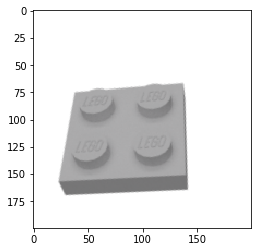

In [121]:
plt.imshow(gen2[18])
len(gen2)

In [109]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2)




In [110]:
?tf.keras.preprocessing.image.ImageDataGenerator